In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.markers import MarkerStyle
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm

# File to Load (Remember to Change These)
sales_csv = Path("Resources/vgsales.csv")

# Read School and Student Data File and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)

In [2]:
sales_data = sales_data.drop(columns="Rank")

In [3]:
#Establish console maker
sales_data['Platform Company'] = sales_data['Platform']

In [4]:
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [5]:
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [6]:
sales_data["Year"].isnull().sum()

271

In [7]:
#drop games with null year
sales_data_clean = sales_data.dropna(subset=["Year"]).copy()

In [8]:
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

In [9]:
mask1 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(mask1, inplace=True)

In [10]:
mask2 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(mask2, inplace=True)

In [11]:
mask3 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(mask3, inplace=True)

In [12]:
genre_name = []

for x in sales_data_clean["Genre"]:
    
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()

In [13]:
bins = [1980, 1990, 2000, 2010, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

sales_decade = sales_data_clean.copy()

sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins,labels)

In [14]:
gcolors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

In [15]:
sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2000s


In [16]:
decade = sales_decade.groupby(["Decade", "Platform Company", "Genre"]).size().reset_index()
decade.columns = ["Decade", "Platform Company", "Genre", "Count"]
decade

,Decade,Platform Company,Genre,Count
0,1980s,3DO,Action,0
1,1980s,3DO,Adventure,0
2,1980s,3DO,Fighting,0
3,1980s,3DO,Misc,0
4,1980s,3DO,Puzzle & Strategy,0
...,...,...,...,...
355,2010s,Sony,Puzzle & Strategy,41
356,2010s,Sony,Role-Playing,237
357,2010s,Sony,Shooter,103
358,2010s,Sony,Simulation,23


In [17]:
sub = decade.loc[(decade["Decade"] == "1980s") & (decade["Platform Company"] == "Nintendo")]
sub

,Decade,Platform Company,Genre,Count
45,1980s,Nintendo,Action,13
46,1980s,Nintendo,Adventure,28
47,1980s,Nintendo,Fighting,3
48,1980s,Nintendo,Misc,3
49,1980s,Nintendo,Puzzle & Strategy,13
50,1980s,Nintendo,Role-Playing,11
51,1980s,Nintendo,Shooter,8
52,1980s,Nintendo,Simulation,1
53,1980s,Nintendo,Sports & Racing,22


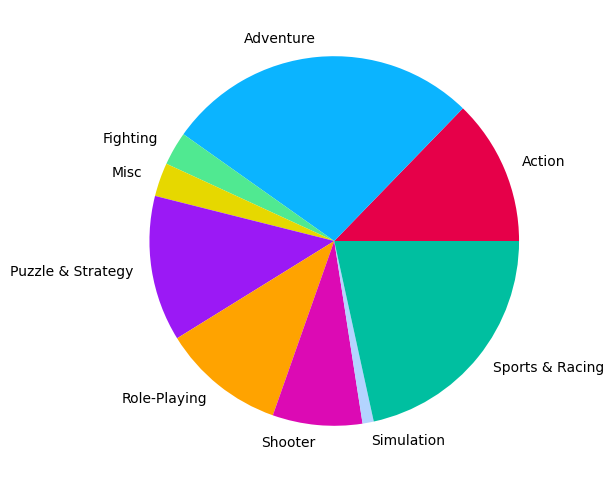

In [18]:
plt.figure(figsize=(10,6))
plt.pie(sub.Count, labels = sub.Genre, colors= gcolors)
plt.show()

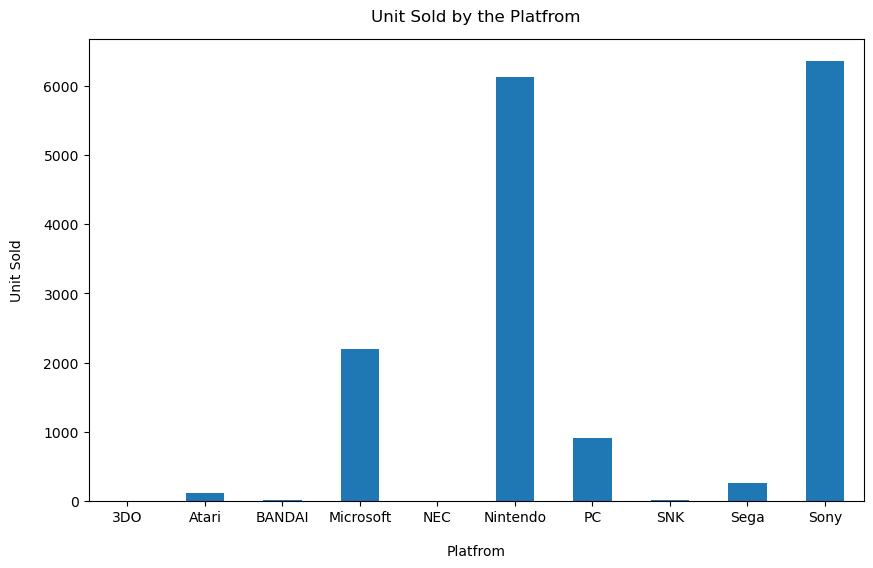

In [19]:
# sales_data_clean.groupby("Platform Company").Global_Sales.count().sort_values().plot(kind="bar")
# sns.set(font_scale=1.4)
sales_data_clean.groupby("Platform Company").Global_Sales.count().plot(kind="bar", figsize=(10, 6), rot=0)
plt.xlabel("Platfrom", labelpad=14)
plt.ylabel("Unit Sold", labelpad=14)
plt.title("Unit Sold by the Platfrom", y=1.02);